#### 计算任意点到曲线的距离

In [1]:
import pyfmm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xarr = np.arange(0, 100, 0.08)
yarr = np.arange(0, 50, 0.05)
zarr = np.array([0.0])  # 二维情况

# 慢度场，慢度为1时，走时即距离
slw  = np.ones((len(xarr), len(yarr), len(zarr)), dtype='f')

# 初始化走时 
iniTT = np.zeros_like(slw)

# 定义曲线所在的零势面(用极小非零数)
iniTT[300:800, 300, :] = 1e-5
iniTT[300:800, 700, :] = 1e-5
iniTT[300, 300:700, :] = 1e-5
iniTT[800, 300:700, :] = 1e-5

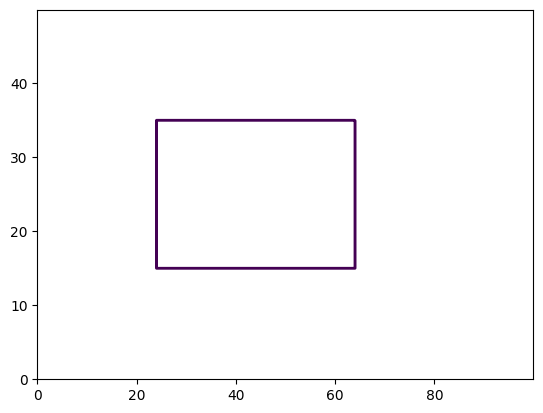

In [3]:
# 零势面形态
fig, ax = plt.subplots(1, 1)
ax.contour(xarr, yarr, iniTT[...,0].T, levels=0)

In [4]:
FSMTT = pyfmm.travel_time_iniTT(
    iniTT,
    xarr, yarr, zarr, slw, useFSM=True, FSMparallel=True)

WARNING! For parallel FSM, maxLoops must set at least 2 (already changed).


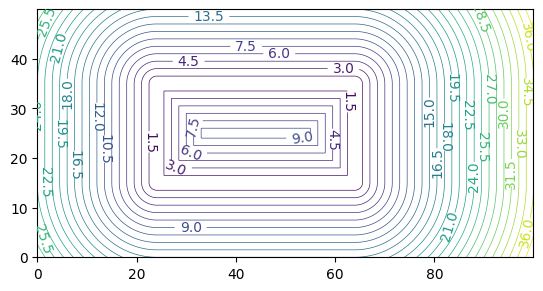

In [5]:
fig, ax = plt.subplots(1, 1)
cs = ax.contour(xarr, yarr, FSMTT[:, :, 0].T, levels=30, linewidths=0.5)
ax.clabel(cs)

ax.set_aspect('equal')